# **MAFAT Radar Challenge - Descriptive Statistics**

Dear participant,    
We welcome you to our competition and wish you a challenging, interesting and fun competition.  
This notebook presents an exploratory analysis of the metadata for the training and the public-test data sets.   
The purpose of this notebook is to give participants a better understanding of the data by describing   
and analyzing the distributions and characteristics of the signals.

[Competition website](https://competitions.codalab.org/competitions/25389)   
[MAFAT Challenge homepage](https://mafatchallenge.mod.gov.il/)



###**Data Description**   
The data contains I/Q signals of humans or animals collected by radar sensors in different locations and times.  
Each signal of human or animal is a single track. The tracks in the dataset are split into 32 time-units segments.   
Each record in the dataset represents a single segment.
The goal is to classify the segments correctly.




####**Data Fields** 
8 fields describe each segment:

  

*   **segment_id** - The segment's unique ID. 
*   **target_type** - What is the object detected in the segment?   
The possible values are: "human", "animal", "empty".
*   **snr_type** - Signal to Noise Ratio (SNR), there are 3 categories:  
High SNR, Low SNR, and Synthetic Low SNR. The Synthetic segments are the   
High SNR signals in the dataset that transformed into Low SNR artificially,   
will be elaborated at the end of this notebook.   
The possible values are: "HighSNR", "LowSNR", "SynthSNR".   
*   **track_id** - Segment is part of a continuous track. Use this identifier to locate all segments of the same track.   
*   **geolocation_type** - Identifies the surrounding terrain type of each location (string, categorical).   
*   **geolocation_id** - Each location has a unique ID (integer).   
*   **sensor_id** - Each Radar has a unique ID (integer). In some of the locations were number of radars.   
*   **date_index** - Numerical, each number represents a unique   calendar day (integer).   

####**Short Overview - Training and Test Sets**   
There are 6,656 signal segments in the training set (taken from 1,510 signal tracks),   
and 106 segments in the public test set.   
The private test set will be accessible only in the second stage of the competition.   
   
The segments in the test set are selected in a way that guarantees a track has at most a single segment,   
with the exception of very long tracks that may contribute more than one segment.    
The segments in the test set and the training set are not from the same tracks.   
Also, in the training set, all the segments of the track are available as opposed to a single segment from each track in the test set.

###**Setup**

In [1]:
%matplotlib inline
import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from termcolor import colored
from IPython.display import display

ModuleNotFoundError: No module named 'seaborn'

In [2]:
mount_path = '/home/agarcia/repos/mafat-radar-challenge/mafat_radar_challenge'
competition_path = 'data'

In [5]:
def load_csv_metadata(file_path):
    """
    Reads csv as pandas DataFrame (only Metadata).

    Arguments:
    file_path -- {str} -- path to csv metadata file

    Returns:
    Pandas DataFarme
    """
    path = os.path.join(mount_path, competition_path, file_path + '.csv')
    with open(path, 'rb') as data:
        output = pd.read_csv(data)
    return output

In [8]:
training_path = 'MAFAT RADAR Challenge - Training Set V1'
test_path = 'MAFAT RADAR Challenge - Public Test Set V1'

training_set = load_csv_metadata(training_path)
test_set = load_csv_metadata(test_path)

###**Training and Test sets Descriptives**

In [9]:
# Number of obserevations (segments), and number of columns (fields)   
# except for the I/Q matrix and the doppler burst vector

print(f"The training set shape is: {training_set.shape}")
print(f"The test set shape is: {test_set.shape}")

The training set shape is: (6656, 8)
The test set shape is: (106, 2)


In [10]:
training_set.head() 

,segment_id,track_id,geolocation_type,geolocation_id,sensor_id,snr_type,date_index,target_type
0,0,11,C,1,1,HighSNR,27,animal
1,1,16,C,1,1,HighSNR,27,animal
2,2,16,C,1,1,HighSNR,27,animal
3,3,29,C,1,1,HighSNR,27,animal
4,4,29,C,1,1,HighSNR,27,animal


In [11]:
test_set.head()

,segment_id,snr_type
0,6656,HighSNR
1,6658,HighSNR
2,6662,LowSNR
3,6664,LowSNR
4,6665,LowSNR


In [12]:
# All fields in metadata are categorical, therefore only simple descriptives 
# like the mode and the number of unique values is relevant.
training_set = training_set.astype(str)
training_set.describe().iloc[1:]

,segment_id,track_id,geolocation_type,geolocation_id,sensor_id,snr_type,date_index,target_type
unique,6656,1510,3,4,4,2,29,2
top,4213,285,A,3,3,LowSNR,20,animal
freq,1,43,4811,4560,4560,4191,714,5757


In [13]:
test_set = test_set.astype(str)
test_set.describe().iloc[1:]

,segment_id,snr_type
unique,106,2
top,6933,HighSNR
freq,1,56


In [14]:
def check_missing(df):
    try:
        df.name =[x for x in globals() if globals()[x] is df][0]
        if sum(df.isnull().sum()) == 0:
          print(f"None of the columns in {df.name} have missing data.")
    except:
        print(df.isnull().any())

check_missing(test_set)
check_missing(training_set)

None of the columns in test_set have missing data.
None of the columns in training_set have missing data.


In [15]:
print(f"The number of tracks in the training set is: {training_set['track_id'].nunique()}")

The number of tracks in the training set is: 1510


As said before, there are 1,510 signal tracks split to 6,656 signal segments in the training set.   
Participants are asked to classify signal segments.   
The tracks and segments' SNR can be Low or High SNR.   
In some cases (200 Tracks) the track is in one part Low SNR and another part High SNR.

*Tracks that have both High and Low SNR are being counted twice as two tracks    
(once for High SNR and once for Low SNR) but have the same track id.*


In [ ]:
tracks_hsnr_and_lsnr = sum(training_set[['track_id', 'snr_type']].
                           groupby('track_id', as_index=False)
                           ['snr_type'].nunique()==2)

tracks_one_snr = sum(training_set[['track_id', 'snr_type']].
                     groupby('track_id', as_index=False)
                     ['snr_type'].nunique()==1)

total_count_of_tracks = training_set.groupby(['track_id', 'snr_type'], 
                                             as_index=False).count()['track_id'].count()

print(f'Number of tracks that are High SNR and Low SNR: {tracks_hsnr_and_lsnr}')
print(f'Number of tracks that are High SNR or Low SNR: {tracks_one_snr}')
print(f'Number of total counted tracks (grouped by snr_type and track_id): {total_count_of_tracks}')

Number of tracks that are High SNR and Low SNR: 200
Number of tracks that are High SNR or Low SNR: 1310
Number of total counted tracks (grouped by snr_type and track_id): 1710



 Bar chart - The frequency of tracks lengthes (number of segments in a single track) in the Training set. 




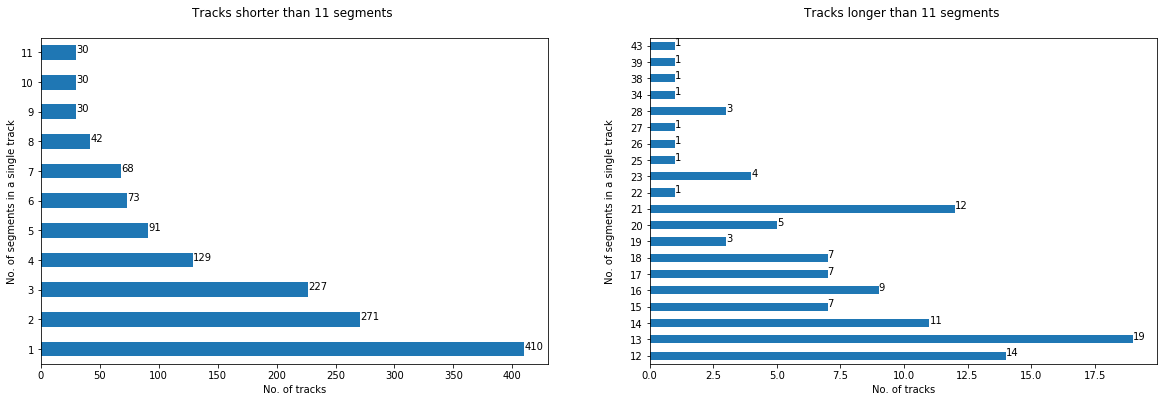


 The number of segments of tracks that are shorter or equal to 11 segments is: 1401

 The number of segments of tracks that are longer than 11 segments is: 109


In [16]:
print("\n Bar chart - The frequency of tracks lengthes (number of segments\
 in a single track) in the Training set. \n\n")

fig = plt.figure()
ax1 = fig.add_subplot(1, 2, 1)
ax2 = fig.add_subplot(1, 2, 2) 

segments_int_track = training_set.groupby('track_id')['segment_id'].count()
segments_int_track.value_counts(sort=False)[:11].plot(kind='barh', 
                                                      figsize =(20,6),
                                                      ax =ax1 )
ax1.set_title("Tracks shorter than 11 segments \n")
ax1.set_ylabel('No. of segments in a single track')
ax1.set_xlabel('No. of tracks')

for index, value in enumerate(segments_int_track.value_counts(sort=False)[:11]):
    ax1.text(value, index, str(value))

segments_int_track = training_set.groupby('track_id')['segment_id'].count()
segments_int_track.value_counts(sort=False)[11:].plot(kind='barh',
                                                      figsize =(20,6),
                                                      ax =ax2 )
ax2.set_title("Tracks longer than 11 segments \n")
ax2.set_ylabel('No. of segments in a single track', labelpad =15)
ax2.set_xlabel('No. of tracks')

for index, value in enumerate(segments_int_track.value_counts(sort=False)[11:]):
    ax2.text(value, index, str(value))

plt.show()

print(f"\n The number of segments of tracks that are shorter or equal to 11\
 segments is: {segments_int_track.value_counts(sort=False)[:11].sum()}")
print(f"\n The number of segments of tracks that are longer than 11\
 segments is: {segments_int_track.value_counts(sort=False)[11:].sum()}")

In [17]:
def ratio(series):
  """
  Calculates ratios in a given series.

  Arguments:
    series -- {series} -- series to calculate ratios for.

  Returns:
    ratio_results -- {series} -- ratio result for each integer in the
                                 series array.
  """

  ratio_results = series.apply(lambda x: '{0:.1%}'.format(x/sum(series)))
  
  return ratio_results

Training Set


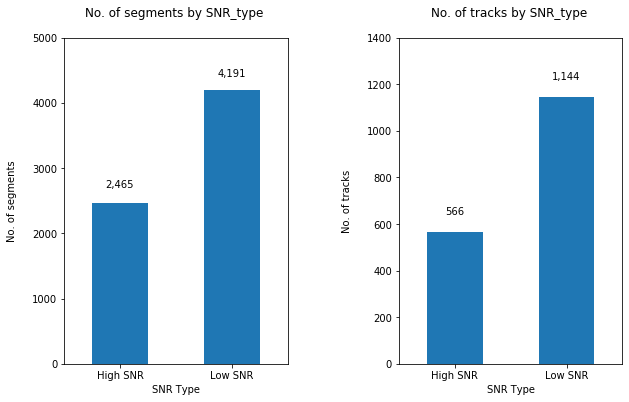

,snr_type,segment_id,ratio
0,HighSNR,2465,37.0%
1,LowSNR,4191,63.0%


,snr_type,track_id,ratio
0,HighSNR,566,33.1%
1,LowSNR,1144,66.9%


In [18]:
# Bar chart - compares the number of tracks and segments by snr type in the training set.

print("Training Set")
fig = plt.figure()

ax1 = fig.add_subplot(1, 2, 1)
ax2 = fig.add_subplot(1, 2, 2) 
fig.subplots_adjust(wspace=0.5)

segments_hsnr_lsnr = training_set.groupby(
    ['snr_type'])['segment_id'].count()
tracks_hsnr_lsnr = training_set.groupby(
    ['snr_type'])['track_id'].nunique()

segments_hsnr_lsnr.plot(kind='bar', figsize=(10,6), ax=ax1)
ax1.set_title("No. of segments by SNR_type \n")
ax1.set_ylabel('No. of segments', labelpad =15)
ax1.set_xlabel('SNR Type')
ax1.set_xticklabels(['High SNR','Low SNR'], rotation =0)
ax1.set_ylim(top=5000)
ax1.text(-0.13,2700,format(segments_hsnr_lsnr[0],','))
ax1.text(0.87,4400,format(segments_hsnr_lsnr[1],','))


tracks_hsnr_lsnr.plot(kind='bar', figsize=(10,6), ax=ax2)
ax2.set_title("No. of tracks by SNR_type \n")
ax2.set_ylabel('No. of tracks', labelpad =15)
ax2.set_xlabel('SNR Type')
ax2.set_xticklabels(['High SNR','Low SNR'], rotation =0)
ax2.set_ylim(top=1400)
ax2.text(-0.09,640,format(tracks_hsnr_lsnr[0],','))
ax2.text(0.87,1220,format(tracks_hsnr_lsnr[1],','))


plt.show()

display(pd.concat([pd.DataFrame(segments_hsnr_lsnr),
                   pd.DataFrame(ratio(segments_hsnr_lsnr)).rename(
                       columns={'segment_id':'ratio'})], 
                   axis=1).reset_index())
display(pd.concat([pd.DataFrame(tracks_hsnr_lsnr),
                   pd.DataFrame(ratio(tracks_hsnr_lsnr)).rename(
                       columns={'track_id':'ratio'})],
                   axis=1).reset_index())

In the public test set, at this stage, it is only relevant and possible to see the distribution of HighSNR and LowSNR by segments.   
The ratio between HighSNR and LowSNR in the test set is more balanced than the ratio in the training set.

Public test Set


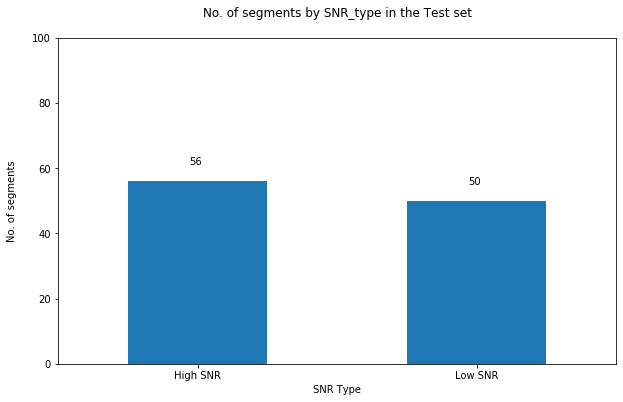

,snr_type,segment_id,ratio
0,HighSNR,56,52.8%
1,LowSNR,50,47.2%


In [19]:
# Bar chart - compares number of segments by snr type in the public test set.
print("Public test Set")
fig = plt.figure()
ax1 = fig.add_subplot(1, 1, 1)

segments_hsnr_lsnr_test = test_set.groupby(['snr_type'])['segment_id'].count()
segments_hsnr_lsnr_test.plot(kind='bar', figsize=(10,6), ax=ax1)
ax1.set_title("No. of segments by SNR_type in the Test set\n")
ax1.set_ylabel('No. of segments', labelpad =15)
ax1.set_xlabel('SNR Type')
ax1.set_xticklabels(['High SNR','Low SNR'], rotation =0)
ax1.set_ylim(top=100)

for index, value in enumerate(segments_hsnr_lsnr_test): 
    label = format(value, ',') 
    ax1.annotate(label, xy=(index-0.03 , value+5), color='black')
    
plt.show()

display(pd.concat([pd.DataFrame(segments_hsnr_lsnr_test),pd.DataFrame(
  ratio(segments_hsnr_lsnr_test)).rename(
      columns={'segment_id':'ratio'})],axis=1).reset_index())

####**Other Training Set Fields Descriptive Statistics**

Tracks and Segments frequencies by target_type and snr_type.

Training Set


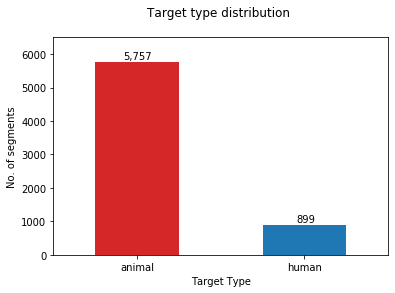

In [20]:
print("Training Set")
target_segments = training_set.groupby(['target_type'])['segment_id'].count()
target_segments_hsnr_lsnr = training_set.groupby(
    ['target_type','snr_type'])['segment_id'].count()
target_tracks_hsnr_lsnr = training_set.groupby(
    ['target_type','snr_type'])['track_id'].nunique()
target_segments.plot(kind='bar', color=['tab:red','tab:blue'])

plt.title('Target type distribution \n')
plt.ylim(top=6500)
plt.ylabel('No. of segments')
plt.xlabel('Target Type')
plt.xticks(rotation =0)
plt.text(-0.08,5850,format(target_segments[0],','))
plt.text(0.95,970,format(target_segments[1],','))
plt.show()

Training Set


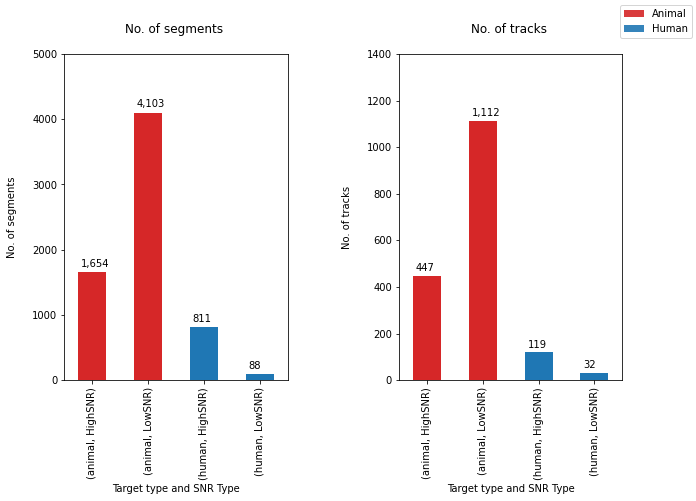

In [ ]:
# Bar chart - compares number of segments and tracks by snr type
# and target type in the training set.
print("Training Set")

fig = plt.figure()
ax1 = fig.add_subplot(1, 2, 1)
ax2 = fig.add_subplot(1, 2, 2) 
fig.subplots_adjust(wspace=0.5)

target_segments_hsnr_lsnr.plot(kind='bar', figsize=(10,6), 
                               color=[
                                      'tab:red','tab:red',
                                      'tab:blue','tab:blue'
                                      ],
                               label='_nolegend_',ax=ax1)
ax1.set_title("No. of segments \n")
ax1.set_ylabel('No. of segments', labelpad =15)
ax1.set_xlabel('Target type and SNR Type')
ax1.set_ylim(top=5000)
ax1.bar(0, target_segments_hsnr_lsnr[0], width=0.01, alpha=0.9, 
        color='tab:red', label='Animal')
ax1.bar(2, target_segments_hsnr_lsnr[2], width=0.01, alpha=0.9,
        color='tab:blue', label='Human')

for index, value in enumerate(target_segments_hsnr_lsnr): 
  label = format(value, ',') 
  ax1.annotate(label, xy=(index-0.2 , value+80), color='black')

target_tracks_hsnr_lsnr.plot(kind='bar', figsize=(10,6), 
                             color=['tab:red','tab:red',
                                    'tab:blue','tab:blue'
                                    ],
                             label='_nolegend_', ax=ax2)
ax2.set_title("No. of tracks \n")
ax2.set_ylabel('No. of tracks', labelpad =15)
ax2.set_xlabel('Target type and SNR Type')
ax2.set_ylim(top=1400)

for index, value in enumerate(target_tracks_hsnr_lsnr): 
  label = format(value, ',') 
  ax2.annotate(label, xy=(index-0.2 , value+20), color='black')

fig.legend()
plt.show()

In [ ]:
target_segments_hsnr_lsnr
segments_display = pd.DataFrame(ratio(target_segments_hsnr_lsnr).reset_index())
segments_display.columns=['targe_type', 'snr_type', 'tracks_count_ratio']
segments_display

,targe_type,snr_type,tracks_count_ratio
0,animal,HighSNR,24.8%
1,animal,LowSNR,61.6%
2,human,HighSNR,12.2%
3,human,LowSNR,1.3%


From tracks perspective the ratios by total are almost the same.

In [ ]:
tracks_display = pd.DataFrame(ratio(target_tracks_hsnr_lsnr).reset_index())
tracks_display.columns=['targe_type', 'snr_type', 'tracks count ratio']
tracks_display

,targe_type,snr_type,tracks count ratio
0,animal,HighSNR,26.1%
1,animal,LowSNR,65.0%
2,human,HighSNR,7.0%
3,human,LowSNR,1.9%


##### **Crosstabulation on the Segments Frequncy - A Deeper Look**
The tables below are crosstabulation of segments frquency by snr_type and target_type.   
The Frequency can be presented in different ratios, depending on the perspective.   
Counting segments relative to the target type or the SNR type.   

For example:    
There are 5,757 animal segments and 899 humans segments in the training set.   
14% of the segments are Humans and 86% are animals.   
37% of the segments are High SNR and 63% are Low SNR.     
Splitting the target type by SNR type show that most of the Low SNR segments are animals (98%).   
Splitting the SNR type by target type shows that 90% of Humans segments are High SNR and 10% are Low SNR.   

See the tables below for more insights.

In [ ]:
# Crosstabulation tables presenting same numbers in different perspectives and ratios
print("Count segments: \n")
display(pd.crosstab(training_set['target_type'],training_set['snr_type'],
                    margins = True).round(2))
print("\n Ratio by target type: \n")
display(pd.crosstab(training_set['target_type'],training_set['snr_type'],
                    normalize=0).round(2))
print("\n Ratio by SNR type: \n")
display(pd.crosstab(training_set['target_type'],training_set['snr_type'],
                    normalize=1).round(2))
print("\n Ratio by SNR type and target type: \n")
display(pd.crosstab(training_set['target_type'],training_set['snr_type'],
                    normalize='all',margins = True).round(2))

Count segments: 



snr_type,HighSNR,LowSNR,All
target_type,,,
animal,1654,4103,5757
human,811,88,899
All,2465,4191,6656



 Ratio by target type: 



snr_type,HighSNR,LowSNR
target_type,,
animal,0.29,0.71
human,0.90,0.10



 Ratio by SNR type: 



snr_type,HighSNR,LowSNR
target_type,,
animal,0.67,0.98
human,0.33,0.02



 Ratio by SNR type and target type: 



snr_type,HighSNR,LowSNR,All
target_type,,,
animal,0.25,0.62,0.86
human,0.12,0.01,0.14
All,0.37,0.63,1.00


#### **Geolocations**
The segments in the training and the test sets are gathered from different geolocations.   
One of the goals of this competition is to test the ability of the participants' models to classify well even though   
test segments can be from a new and unfamiliar geolocation_type or geolocation_id.   
Remember, in the test set there are segments from new geolocations that are not in the training set.

##### **Perfect Multicollinearity - geolocation_id**
The geolocation field has Multicollinearity with other fields in the training set.   
These relations do not necessarily exist in the auxiliary and test sets.   


1. Each geolocation id belongs to one geolocation type (This     
statement holds for all data sets). In each geolocation type can be   
one or more geolocation id.
2. In the training set, each geolocation id has one sensor.
3. In the training set, some of the date indices are unique for     specific geolocations.   
This means that in some calendar days only one geolocation recorded signals.   
4. Some of the geolocations may have only one target type.   
5. All geolocations have High and Low SNR segments.

*Statements 2 and 3 are not necessarily true for geolocations in the auxiliary and test sets.*

In [ ]:
print('Geolocation id, geolocation type and sensor_id: \n')
display = pd.DataFrame(training_set.groupby(
    ['geolocation_type','geolocation_id', 'sensor_id'])['segment_id'].
    count())
display.columns=['segment_id count']
display.reset_index(inplace=True)
display

Geolocation id, geolocation type and sensor_id: 



,geolocation_type,geolocation_id,sensor_id,segment_id count
0,A,2,2,251
1,A,3,3,4560
2,C,1,1,944
3,D,4,4,901


In [ ]:
print('More than 1 geolocation_id in a sindgle date: \n')

date_geolocation = training_set.groupby(['date_index'])['geolocation_id'].nunique()
date_geolocation = date_geolocation[date_geolocation>1]
date_geolocation_unique = training_set.groupby(['date_index'])['geolocation_id'].unique()
date_geolocation_unique = date_geolocation_unique.loc[date_geolocation[date_geolocation>1].index]

multiple_locations_dates = pd.concat([date_geolocation,date_geolocation_unique],axis=1)
multiple_locations_dates.columns = ['number of locations', 'geolocation id']
multiple_locations_dates.reset_index()

More than 1 geolocation_id in a sindgle date: 



,date_index,number of locations,geolocation id
0,15,2,"[2, 3]"
1,16,2,"[2, 3]"
2,17,2,"[2, 3]"
3,18,2,"[2, 3]"
4,19,2,"[2, 3]"
5,20,2,"[2, 3]"
6,23,2,"[2, 3]"
7,6,2,"[2, 3]"
8,7,2,"[2, 3]"
9,8,2,"[2, 3]"


##### **Analysis of the Distribution by target_type and geolocation_id**
*See tables and graphs below for an analysis of the distribution of target type and geolocation id.*

In [ ]:
target_geolocation_segments = training_set.groupby(
    ['target_type','geolocation_id'])['segment_id'].count()

target_geolocation_id_1_and_4_hsnr_lsnr = training_set.groupby(
    ['target_type', 'geolocation_id','snr_type'])['segment_id'].count().\
    drop(labels=[('animal', '2'), ('animal', '3')])

target_geolocation_id_1_and_4_tracks_hsnr_lsnr = training_set.groupby(
    ['target_type', 'geolocation_id', 'snr_type'])['track_id'].nunique().\
    drop(labels=[('animal', '2'), ('animal', '3')])


Training Set


segment_id count
target_type geolocation_id                  
animal      1                            468
            2                            251
            3                           4560
            4                            478
human       1                            476
            4                            423

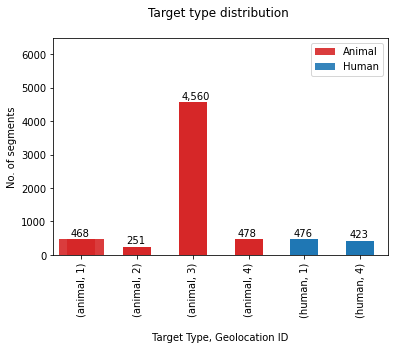

,geolocation_id,snr_type,Animal,Human,Row Total,Animal/Row Total,Human/Row Total
0,1,HighSNR,230,444,674,0.34,0.66
1,1,LowSNR,238,32,270,0.88,0.12
2,2,HighSNR,190,0,190,1.00,0.00
3,2,LowSNR,61,0,61,1.00,0.00
4,3,HighSNR,1043,0,1043,1.00,0.00
5,3,LowSNR,3517,0,3517,1.00,0.00
6,4,HighSNR,191,367,558,0.34,0.66
7,4,LowSNR,287,56,343,0.84,0.16
8,Total,,5757,899,6656,0.86,0.14


In [ ]:
print("Training Set")
from IPython.display import display
display(pd.DataFrame(target_geolocation_segments).rename(
    columns={'segment_id':'segment_id count'}))

color_list=['tab:red']*4+['tab:blue']*2
target_geolocation_segments.plot(kind='bar', color = color_list,
                                 label='_nolegend_')
plt.bar(0, target_geolocation_segments[0], alpha=0.9, color='tab:red',
                label='Animal')
plt.bar(6, target_geolocation_segments[4], alpha=0.9, color='tab:blue',
                label='Human')
plt.title('Target type distribution \n')
plt.ylim(top=6500)
plt.ylabel('No. of segments')
plt.xlabel('\n Target Type, Geolocation ID ')

for index, value in enumerate(target_geolocation_segments): 
    label = format(value, ',')
    plt.annotate(label, xy=(index-0.2 , value+90), color='black')
plt.legend()
plt.show()

geolocation_distribution = pd.concat(
    [pd.crosstab([training_set.geolocation_id,training_set.snr_type],
                 training_set.target_type, margins=True, margins_name="Total"),
     pd.crosstab([training_set.geolocation_id,training_set.snr_type], 
                 training_set.target_type, margins=True, normalize=0, 
                 margins_name="Total").round(2)], axis=1
                 )
geolocation_distribution.columns = [
                                    'Animal', 'Human', 'Row Total',
                                    'Animal/Row Total','Human/Row Total'
                                    ]
geolocation_distribution.reset_index(inplace=True)
geolocation_distribution

The same distribution can be presented from a different angle:

In [ ]:
geolocation_distribution = pd.concat(
    [pd.crosstab([training_set.target_type, training_set.snr_type],
    training_set.geolocation_id, margins=True, margins_name="Total"), 
    pd.crosstab([training_set.target_type, training_set.snr_type], 
                training_set.geolocation_id, margins=True, normalize=0,
                margins_name="Total").round(2)], axis=1
                )
geolocation_distribution.columns = [
                                    '1', '2', '3', '4', 'Row_Total',
                                    'Ratio 1', 'Ratio 2', 'Ratio 3',
                                    'Ratio 4',
                                    ]
geolocation_distribution

1    2     3    4  ...  Ratio 1  Ratio 2  Ratio 3  Ratio 4
target_type snr_type                       ...                                    
animal      HighSNR   230  190  1043  191  ...     0.14     0.11     0.63     0.12
            LowSNR    238   61  3517  287  ...     0.06     0.01     0.86     0.07
human       HighSNR   444    0     0  367  ...     0.55     0.00     0.00     0.45
            LowSNR     32    0     0   56  ...     0.36     0.00     0.00     0.64
Total                 944  251  4560  901  ...     0.14     0.04     0.69     0.14

[5 rows x 9 columns]

##### **Analysis without geolocation_id 2 and 3**
One can see that geolocation 3 is very different from other geolocations and cause for imbalance in the training set.   
Also, notice that geolocations 2 and 3 have only Animals segments.   
Below, a plot of the same bar chart without geolocations 2 and 3.   

In [ ]:
target_geolocation_1_and_4_segments = target_geolocation_segments.drop(
    labels=[('animal', '2'),('animal', '3')])

Training set


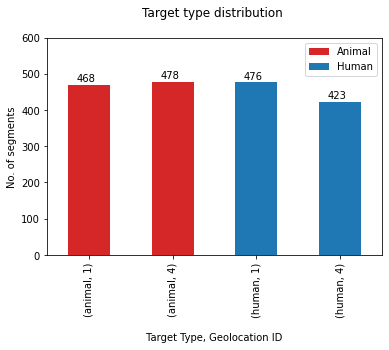

In [ ]:
print("Training set")

color_list=['tab:red']*2+['tab:blue']*2
target_geolocation_1_and_4_segments.plot(kind='bar', color = color_list,
                                 label='_nolegend_')
plt.title('Target type distribution \n')
plt.ylim(top=600)
plt.ylabel('No. of segments')
plt.xlabel('\n Target Type, Geolocation ID ')

for index, value in enumerate(target_geolocation_1_and_4_segments):
  label = format(value, ',')
  plt.annotate(label, xy=(index-0.15, value+10), color='black')

plt.bar(0, target_geolocation_1_and_4_segments[0], width=0.01, alpha=1, 
        color='tab:red', label='Animal')
plt.bar(2, target_geolocation_1_and_4_segments[2], width=0.01, alpha=1, 
        color='tab:blue', label='Human')
plt.legend()
plt.show()

Excluding geolocations 2 and 3 reveals a more balanced distribution of the target types.

In [ ]:
target_geolocation_segments_count_and_ratio_1_and_4 = pd.DataFrame(data=[target_geolocation_1_and_4_segments,
                                                                 ratio(target_geolocation_1_and_4_segments)])
target_geolocation_segments_count_and_ratio_1_and_4.set_index([['count segments', 'ratio']], inplace=True)
target_geolocation_segments_count_and_ratio_1_and_4

target_type    animal         human       
geolocation_id      1      4      1      4
count segments    468    478    476    423
ratio           25.4%  25.9%  25.8%  22.9%

Training set


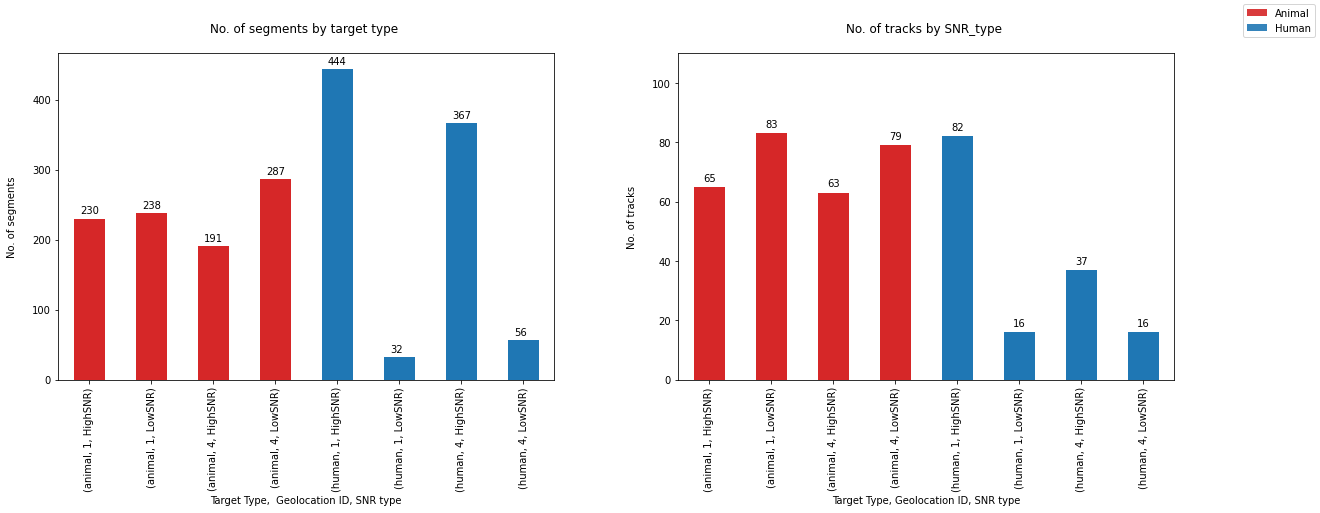

In [ ]:
# Bar chart - compares number of segments and tracks by snr type
# target type and geolocation id in the training set.
print("Training set")

fig = plt.figure()
ax1 = fig.add_subplot(1, 2, 1)
ax2 = fig.add_subplot(1, 2, 2) 
fig.subplots_adjust(wspace=0.25)
color_list=['tab:red']*4+['tab:blue']*4

target_geolocation_id_1_and_4_hsnr_lsnr.plot(kind='bar', figsize=(20,6), 
                                  color = color_list, label='_nolegend_',
                                  ax=ax1)
ax1.set_title("No. of segments by target type \n")
ax1.set_ylabel('No. of segments', labelpad =15)
ax1.set_xlabel('Target Type,  Geolocation ID, SNR type')
ax1.bar(0, target_geolocation_id_1_and_4_hsnr_lsnr[0], width=0.01, alpha=0.9, 
        color='tab:red', label='Animal')
ax1.bar(2, target_geolocation_id_1_and_4_hsnr_lsnr[6], width=0.01, alpha=0.9,
        color='tab:blue', label='Human')

for index, value in enumerate(target_geolocation_id_1_and_4_hsnr_lsnr):
  label = format(value, ',')
  ax1.annotate(label, xy=(index-0.15, value+7), color='black')


target_geolocation_id_1_and_4_tracks_hsnr_lsnr.plot(kind='bar', figsize=(20,6), 
                                         color=color_list, label='_nolegend_',
                                         ax=ax2)
ax2.set_title("No. of tracks by SNR_type \n")
ax2.set_ylabel('No. of tracks', labelpad =15)
ax2.set_xlabel('Target Type, Geolocation ID, SNR type')

ax2.set_ylim(top=110)
for index, value in enumerate(target_geolocation_id_1_and_4_tracks_hsnr_lsnr):
  label = format(value, ',')
  ax2.annotate(label, xy=(index-0.1, value+2), color='black')

fig.legend()
plt.show()


### **Auxiliary**
The auxiliary dataset is separated into 3 sets:   

1. **Synthetic**   
File name: *MAFAT RADAR Challenge - Auxiliary Synthetic Set V1*      
This set is an augmentation of the High SNR segments from the train set. The High SNR segments transformed into Low SNR by adding random "white noise" to each segment. Therefore, the distribution of this set is identical to the distribution of the High SNR segments in the training set. 
     
2. **Background (empty) Tracks**   
File name: *MAFAT RADAR Challenge - Auxiliary Background(empty) Set V1*   
The segments in this set are signals in the same geolocation, time and direction that did not recieve the target.   
The target (human or animal) does not appear in these segments.   
These tracks can help to separate between the "background noise" and the target. Background segments are available only in geolocation_ids 2,3,5,6. 
    
3. **Experiment geolocations (geolocation_id 5,6,7)**   
File name: *MAFAT RADAR Challenge - Auxiliary Experiment Set V1*     
This set has segments of humans from 3 different geolocations.   
The signals from these geolocations are not "natural" recordings (as opposed to the segments in the training and test set) of humans.   
These geolocations are used for controlled tests of the radars.      

#### **Auxiliary - Summary Descriptive Statistics**


*   The Auxiliary Synthetic set has segments from all geolocation_id. There are 50,883 segments from 3,232 tracks.    
These equal to the number of segments and tracks of High SNR in the Training and Experiment data sets.   
The snr_type value is labeled "SynthSNR".
*   The Auxiliary Background set has segments from 4 geolocation_id ([2, 3] - only animals, [5, 6] - only humans). There are 31,128 segments from 3,064 tracks.   
The target_type is labeled "empty".
*   The Auxiliary Experiment set has segments from 3 geolocation_id (5, 6, 7), all segments of the same target ("human"). There are 49,071 segments from 3,006 tracks. 

In [ ]:
synthetic_path = 'MAFAT RADAR Challenge - Auxiliary Synthetic Set V1'
background_path = 'MAFAT RADAR Challenge - Auxiliary Background(empty) Set V1'
experiment_path = 'MAFAT RADAR Challenge - Auxiliary Experiment Set V1'

synthetic_set = load_csv_metadata(synthetic_path)
background_set = load_csv_metadata(background_path)
experiment_set = load_csv_metadata(experiment_path)

In [ ]:
print(f"The Synthetic set shape is: {synthetic_set.shape}")
print(f"The Background set shape is: {background_set.shape}")
print(f"The Experiment geolocations set shape is: {experiment_set.shape}")


The Synthetic set shape is: (50883, 8)
The Background set shape is: (31128, 8)
The Experiment geolocations set shape is: (49071, 8)


In [ ]:
for df in [synthetic_set, background_set, experiment_set]:
  tracks_hsnr_and_lsnr = sum(df[['track_id', 'snr_type']].
                            groupby('track_id', as_index=False)
                            ['snr_type'].nunique()==2)

  tracks_one_snr = sum(df[['track_id', 'snr_type']].
                      groupby('track_id', as_index=False)
                      ['snr_type'].nunique()==1)

  total_count_of_tracks = df.groupby(['track_id', 'snr_type'], 
                                              as_index=False).count()['track_id'].count()
  
  df.name =[x for x in globals() if globals()[x] is df][0]
  print(f'Tracks count in {df.name}')
  print(f'Number of tracks that are High SNR and Low SNR: {tracks_hsnr_and_lsnr:,}')
  print(f'Number of tracks that are High SNR or Low SNR: {tracks_one_snr:,}')
  print(f'Number of total counted tracks (grouped by snr_type and track_id): {total_count_of_tracks:,} \n')

Tracks count in synthetic_set
Number of tracks that are High SNR and Low SNR: 0
Number of tracks that are High SNR or Low SNR: 3,232
Number of total counted tracks (grouped by snr_type and track_id): 3,232 

Tracks count in background_set
Number of tracks that are High SNR and Low SNR: 177
Number of tracks that are High SNR or Low SNR: 2,710
Number of total counted tracks (grouped by snr_type and track_id): 3,064 

Tracks count in experiment_set
Number of tracks that are High SNR and Low SNR: 288
Number of tracks that are High SNR or Low SNR: 2,430
Number of total counted tracks (grouped by snr_type and track_id): 3,006 



#### **Relation between Auxiliary and Training data sets - *Important!**
Connecting between the segments in the Synthetic and Background data sets to the training set "original" segments can be done by using the segment_id.   
The background's segments have segment_id with 1,000,000 added to the original segment_id in the training set, and the synthetic's segments have segment_id with 2,000,000 added to the original segment_id in the training set.    
For example:   
segment_id in the training set of an High SNR = 123   
segment_id of the background segment = 1,000,123   
segment_id of the synthetic segment = 2,000,123  


# Observe tracking

In [1]:
import pickle
import numpy as np

In [2]:
train_data_path = "/home/agarcia/repos/mafat-radar-challenge/mafat_radar_challenge/data/MAFAT RADAR Challenge - Training Set V1.pkl"
with open(train_data_path, 'rb') as data:
    train_data = pickle.load(data)

In [7]:
train_data["doppler_burst"].shape

(6656, 32)

In [4]:
np.mean(np.max(train_data["doppler_burst"], axis=1) - np.min(train_data["doppler_burst"], axis=1))

66.27764423076923

In [11]:
np.mean(np.std(train_data["doppler_burst"], axis=1))*2

46.40854220992392

In [18]:
np.mean(np.std(train_data["doppler_burst"], axis=1))*4

92.81708441984784

In [13]:
np.max(train_data["doppler_burst"], axis=1) - np.min(train_data["doppler_burst"], axis=1)

array([ 31, 120,  16, ...,  14,  37,  32], dtype=uint8)